In [1]:
import pandas as pd
import numpy as np

In [2]:
nsfg = pd.read_hdf("nsfg.hdf5",'nsfg')

what is the average birth weight for babies in the U.S.?

In [3]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [4]:
nsfg.shape

(9358, 10)

In [5]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [6]:
ounces = nsfg['birthwgt_oz1']

In [7]:
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


In [8]:
pounds = nsfg['birthwgt_lb1']

In [9]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [10]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [11]:
pounds = pounds.replace([98,99],np.nan)

In [12]:
pounds.mean()

6.703286384976526

In [13]:
ounces.replace([98,99], np.nan, inplace = True)

In [14]:
birth_weight = pounds + ounces/16
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

In [15]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

What the fuck is 8? So, if we look out [here](https://www.icpsr.umich.edu/icpsradmin/nsfg/variable/815953?studyNumber=9999), we'll find this value indicates that the respondent refused to answer the question.  

In [16]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [17]:
# Select the columns and divide by 100
agecon = nsfg.agecon/100
agepreg = nsfg.agepreg/100

In [18]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg-agecon

In [19]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


In [20]:
import matplotlib.pyplot as plt

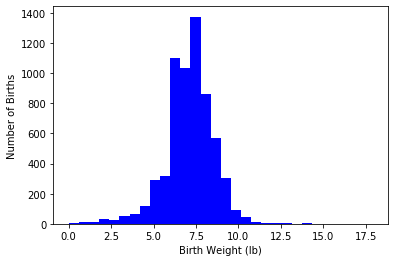

In [21]:
plt.hist(birth_weight.dropna(), bins=30, color="#0000FF")
plt.xlabel("Birth Weight (lb)")
plt.ylabel("Number of Births")
plt.show()

In [22]:
preterm = nsfg['prglngth'] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [23]:
preterm.sum()

3742

In [24]:
preterm.mean()

0.39987176747168196

In [25]:
preterm_w = birth_weight[preterm]
preterm_w.mean()

5.577598314606742

In [26]:
fullterm_w = birth_weight[~preterm]
fullterm_w.mean()

7.372323879231473

## Nou
*wala*

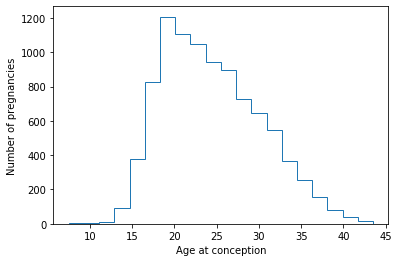

In [27]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

In [28]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


## GSS Survey

In [29]:
gss = pd.read_hdf('gss.hdf5')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


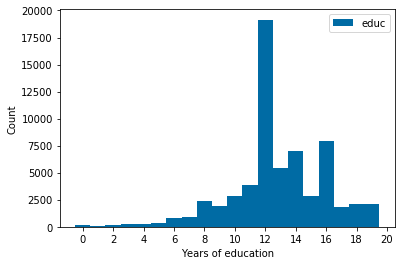

In [30]:
educ = gss['educ']
plt.style.use("tableau-colorblind10")
plt.hist(educ.dropna(), label='educ',bins=20, align='left')
plt.legend()
plt.xticks(list(range(0,21,2)))
plt.xlabel('Years of education')
plt.ylabel('Count')
plt.show()

In [104]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

bmh


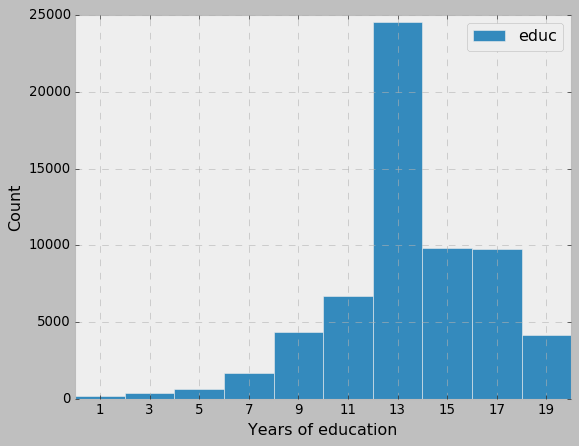

classic


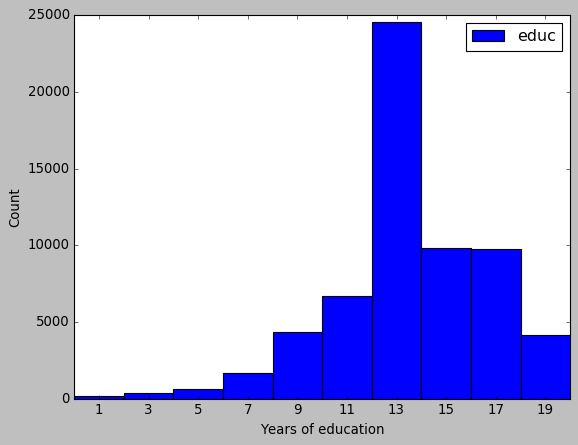

dark_background


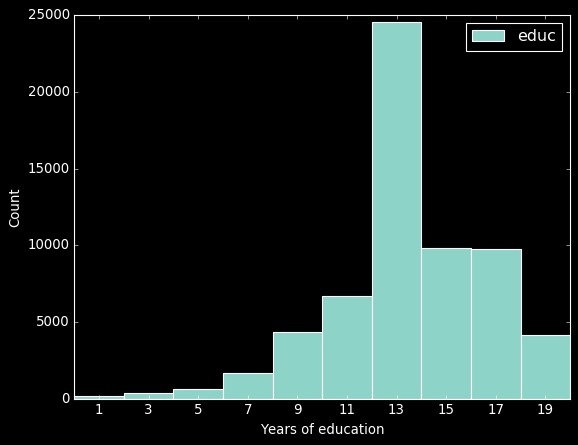

fast


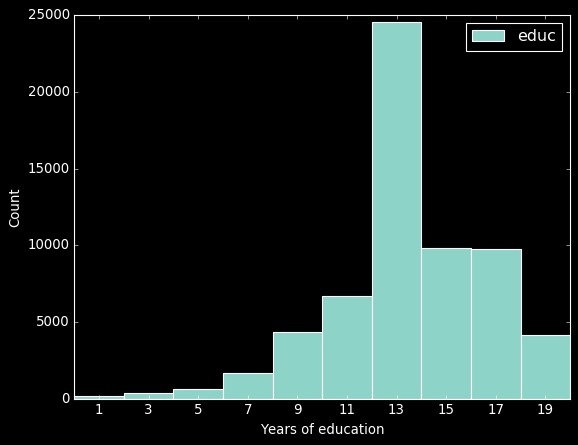

fivethirtyeight


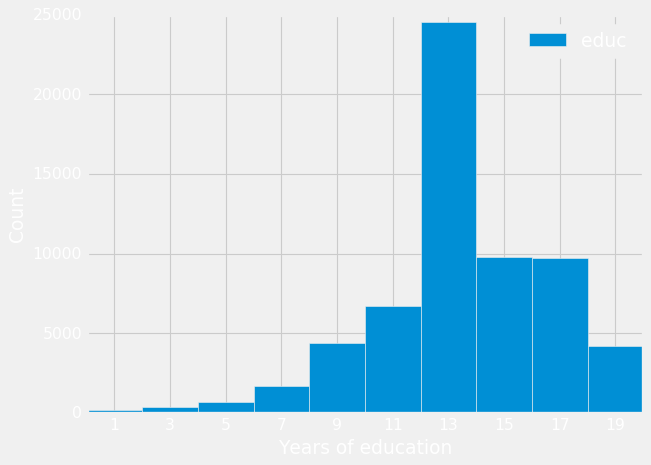

ggplot


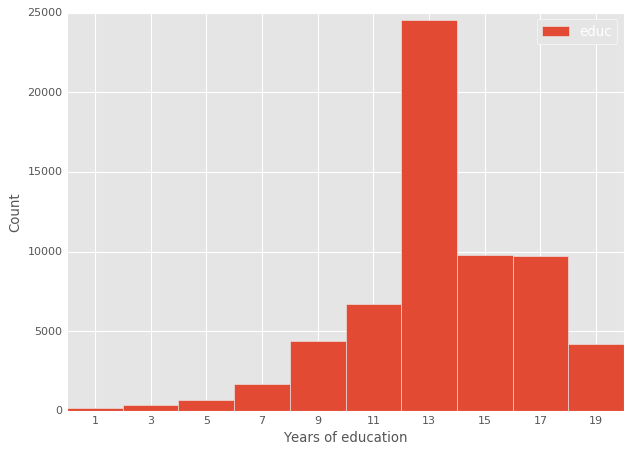

grayscale


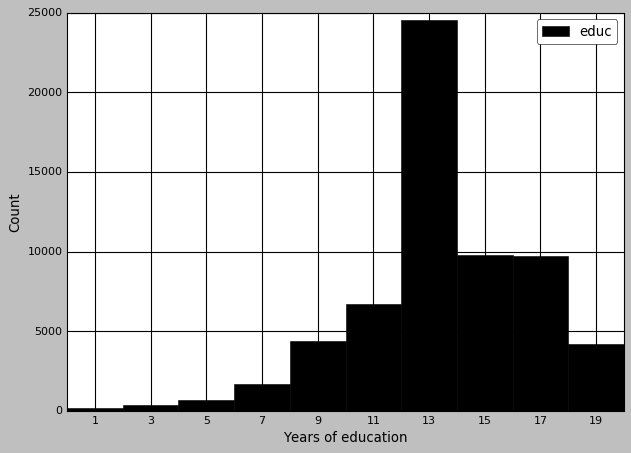

seaborn-bright


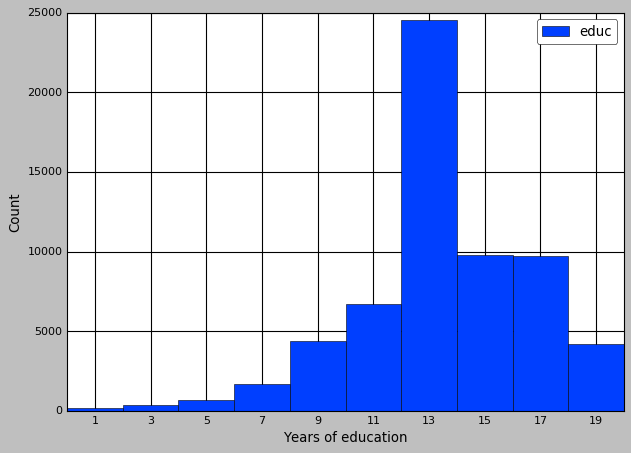

seaborn-colorblind


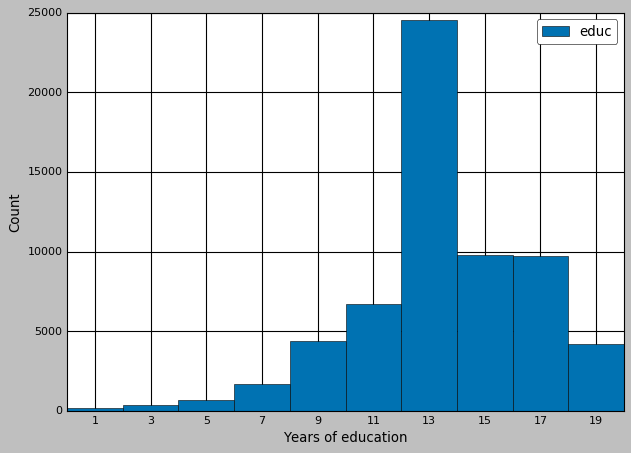

seaborn-dark-palette


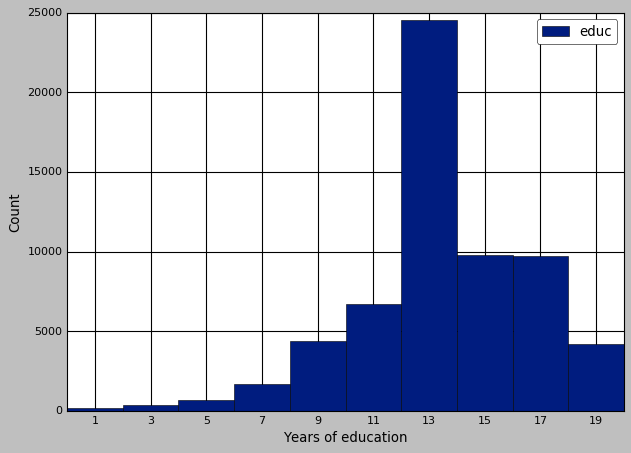

seaborn-dark


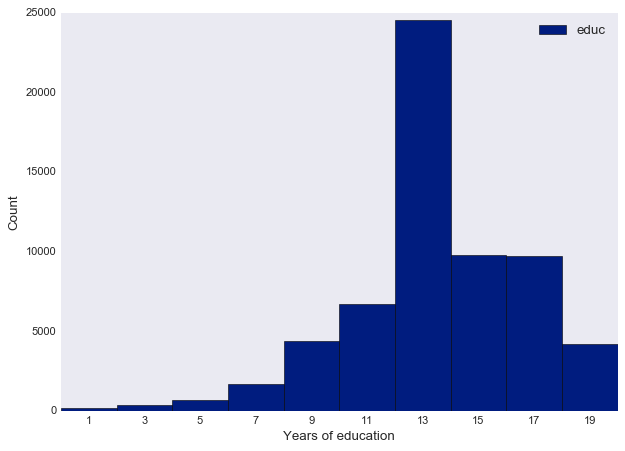

seaborn-darkgrid


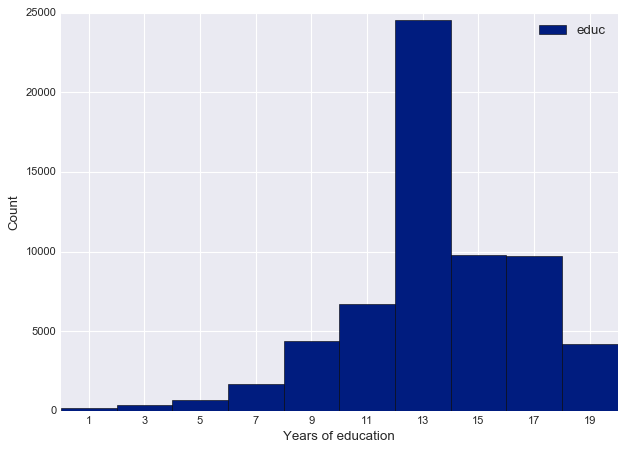

seaborn-deep


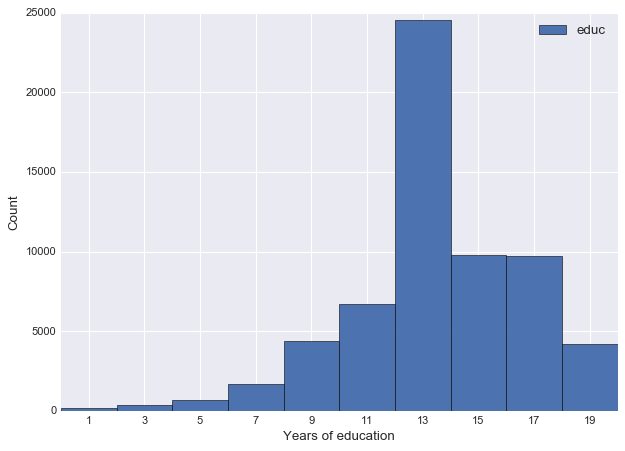

seaborn-muted


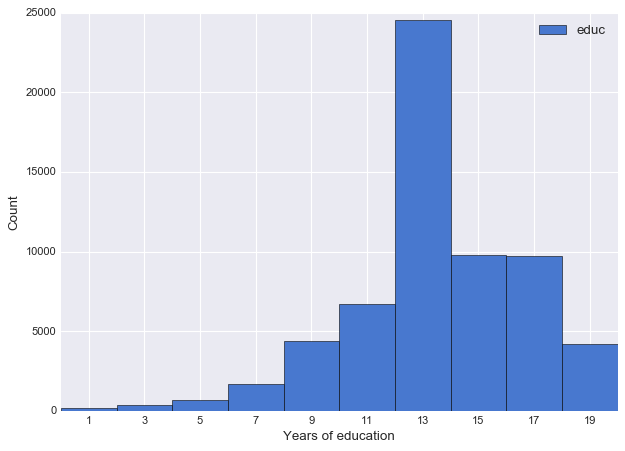

seaborn-notebook


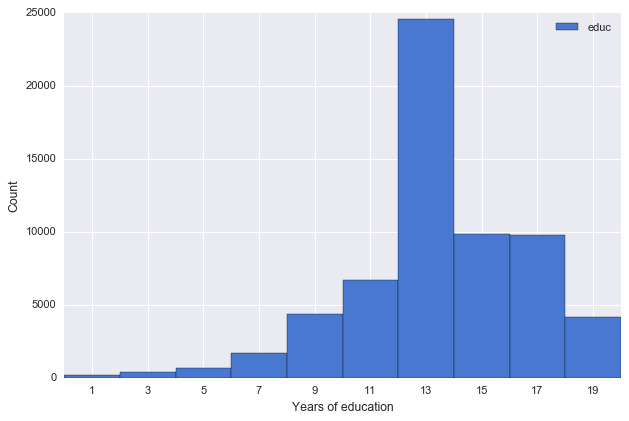

seaborn-paper


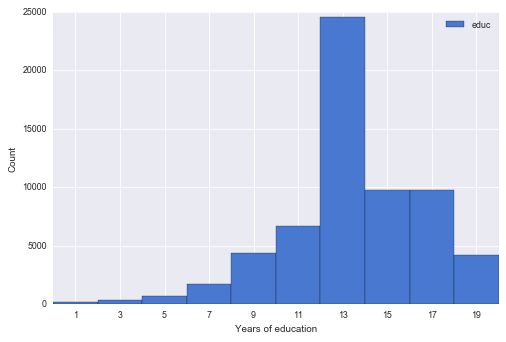

seaborn-pastel


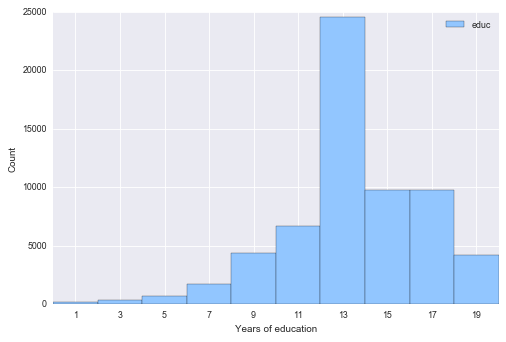

seaborn-poster


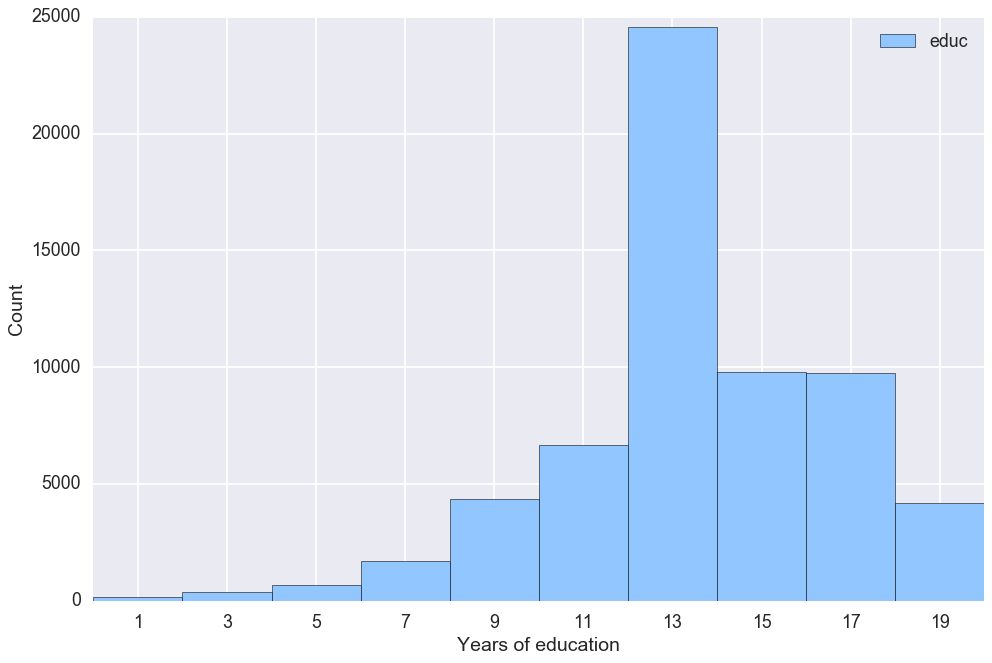

seaborn-talk


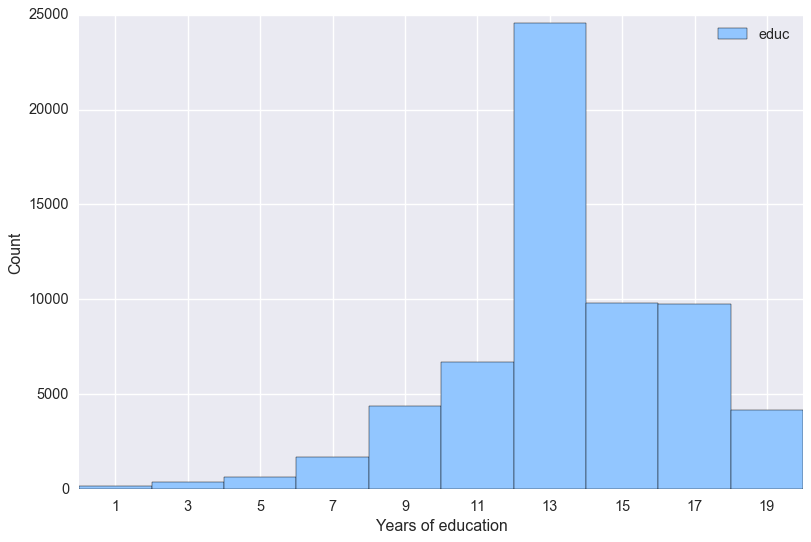

seaborn-ticks


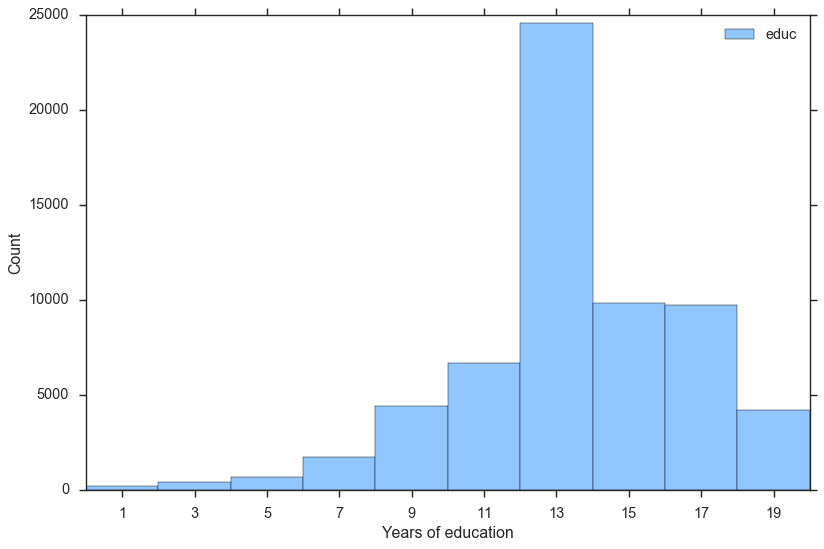

seaborn-white


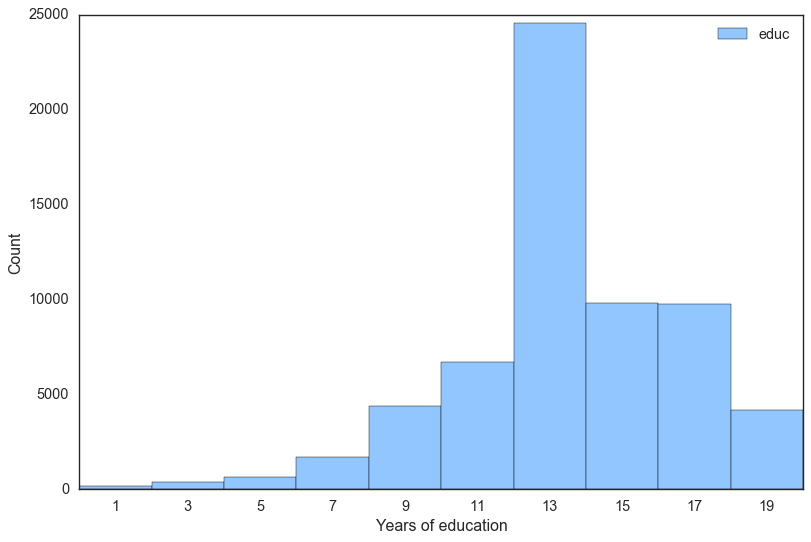

seaborn-whitegrid


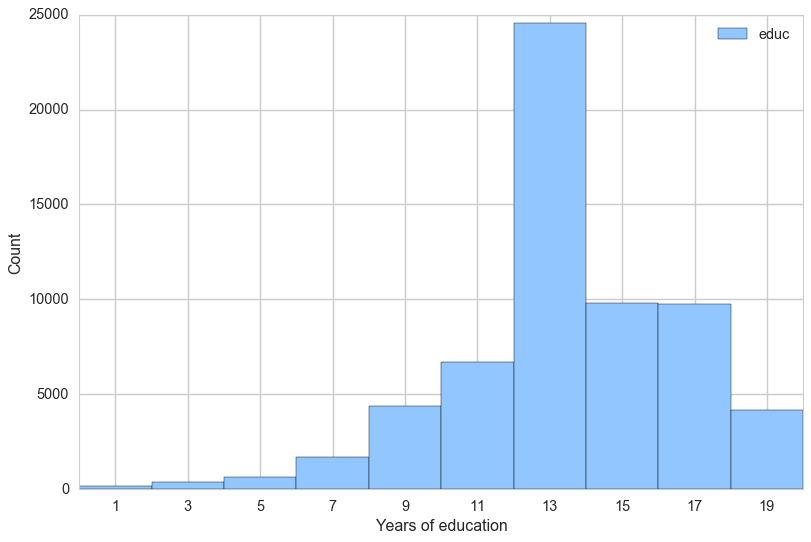

seaborn


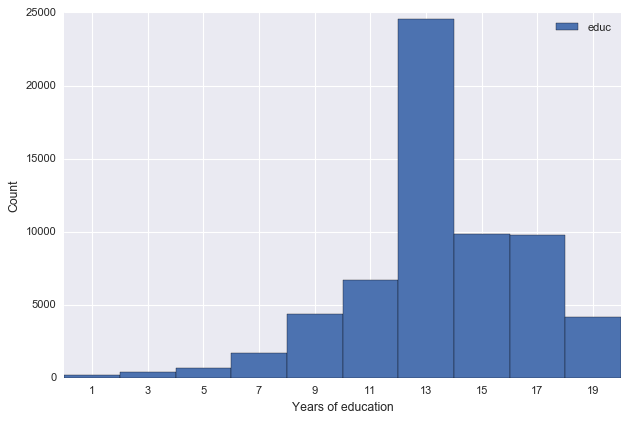

Solarize_Light2


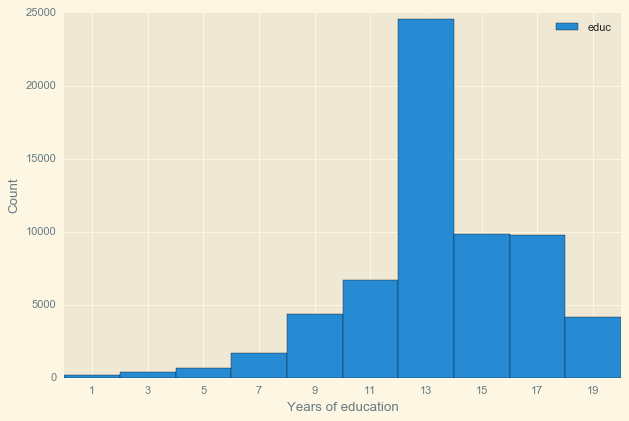

tableau-colorblind10


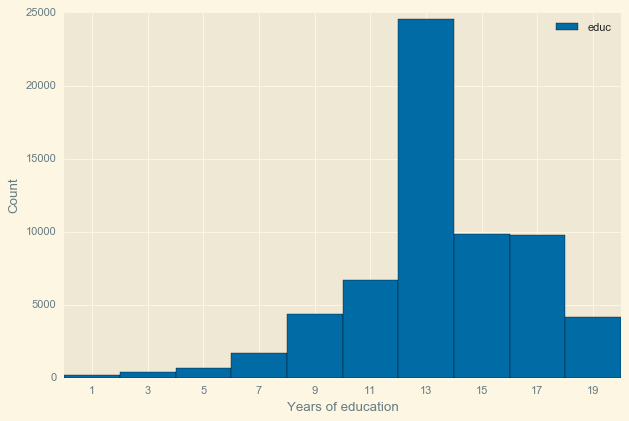

_classic_test


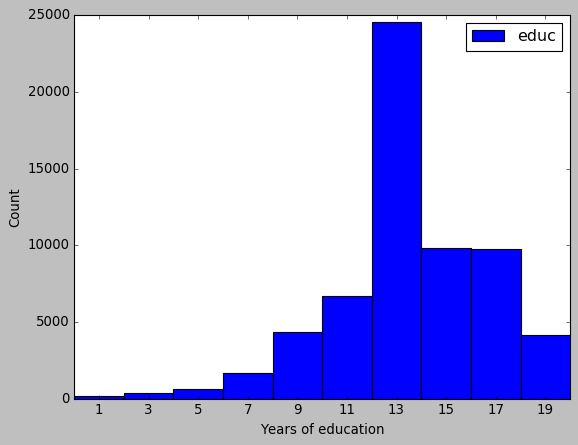

In [136]:
for j in plt.style.available:
    print(j)
    plt.style.use(j)
    plt.hist(educ.dropna(), label='educ')
    plt.legend()
    plt.xticks(list(range(1,21,2)))
    plt.xlabel('Years of education')
    plt.ylabel('Count')
    plt.show()
    

In [122]:
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

## PMF

In [45]:
!pip install empiricaldist==0.3.8

  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\46\48\e3\5d4d76a8cd55dd92a7fdd53355867ee512d70dffa065c9f510
Successfully built empiricaldist
  Found existing installation: empiricaldist 0.3.5
    Uninstalling empiricaldist-0.3.5:
      Successfully uninstalled empiricaldist-0.3.5


In [31]:
from empiricaldist import Pmf

In [32]:
pmf_educ = Pmf(educ)
pmf_educ

,probs
0,18.0
1,12.0
2,12.0
3,14.0
4,12.0
...,...
62461,13.0
62462,16.0
62463,13.0
62464,12.0


In [33]:
# Compute the PMF for year
pmf_year = Pmf(gss['year'])

# Print the result
print(pmf_year)

0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
62461    2016
62462    2016
62463    2016
62464    2016
62465    2016
Name: year, Length: 62466, dtype: int64


In [34]:
age = gss['age']

In [35]:
bins = age.dropna().unique()

In [36]:
len(bins)

72

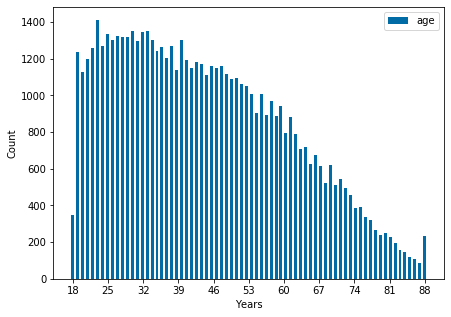

In [37]:
plt.figure(figsize=(7,5))
plt.style.use("tableau-colorblind10")
plt.hist(age.dropna(), label='age',bins=len(bins), align='left', rwidth=0.6)
plt.legend()
plt.xticks(list(range(int(min(bins)),int(max(bins)),7)))
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

In [47]:
from empiricaldist import Cdf

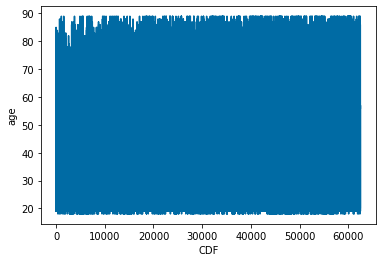

In [48]:
cdf = Cdf(gss['age'])
cdf.plot()
plt.xlabel('CDF')
plt.ylabel('age')
plt.show()

In [44]:
cdf

array([24., 19., 65., ..., 46., 65., 36.])

In [49]:
ecdf?

Object `ecdf` not found.


In [50]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(data)+1) / n

    return x, y

In [52]:
ecdf(gss['age'].dropna())

(array([18., 18., 18., ..., nan, nan, nan]),
 array([1.60087087e-05, 3.20174175e-05, 4.80261262e-05, ...,
        9.99967983e-01, 9.99983991e-01, 1.00000000e+00]))

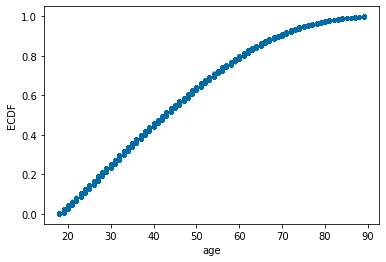

In [57]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_age, y_age = ecdf((gss['age']).dropna())

# Generate plot
plt.plot(x_age, y_age, marker='.', linestyle='none')

# Label the axes
plt.xlabel('age')
plt.ylabel('ECDF')

# Display the plot
plt.show()